In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 10.1.21, 10.2.11, 10.4.21, 10.5.21, 10.6.21

# 10.2.11  =======================

In [22]:
# Метод конечных разностей
def finite_difference(N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)

    # Формируем систему уравнений
    A = np.zeros((N+1, N+1))
    F = np.zeros(N+1)

    # Заполняем матрицу A и вектор F
    for i in range(1, N):
        xi = x[i]
        A[i, i-1] = 1/h**2 - p(xi)/(2*h)
        A[i, i] = -2/h**2 + q(xi)
        A[i, i+1] = 1/h**2 + p(xi)/(2*h)
        F[i] = f(xi)

    # Граничные условия
    A[0, 0], A[N, N] = 1, 1
    F[0], F[N] = UA, UB

    # Решаем систему
    U = np.linalg.solve(A, F)

    return x, U

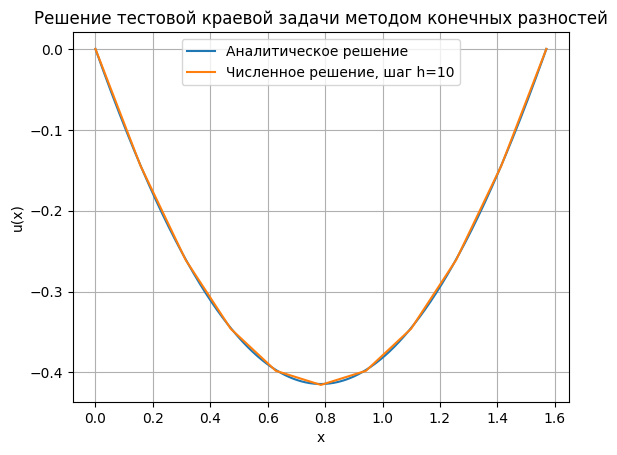

In [23]:
# Тестовая задача
def p(x):
    return 0

def q(x):
    return 1

def f(x):
    return 1

# Граничные условия и параметры
a, b = 0, np.pi/2
UA, UB = 0, 0
epsilon = 0.02
initial_N = 10

x, U = finite_difference(initial_N)
x_analytic = np.linspace(0, np.pi/2, 1000)
U_analytic = -np.sin(x_analytic) - np.cos(x_analytic) + 1

# Построение графика
plt.plot(x_analytic, U_analytic, label=f'Аналитическое решение')
plt.plot(x, U, label=f'Численное решение, шаг h={initial_N}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение тестовой краевой задачи методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()


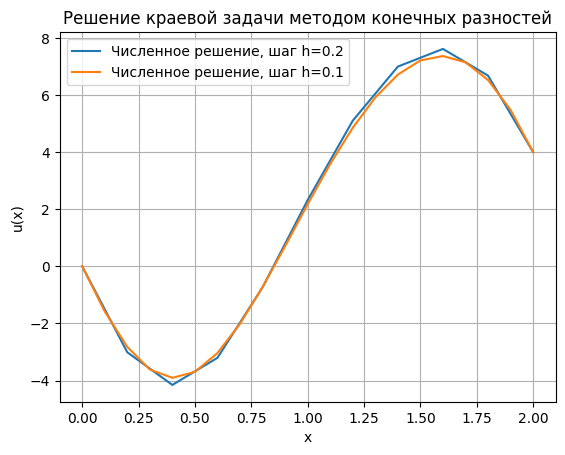

In [25]:
def p(x):
    return (1/4) * (1 - x**2)

def q(x):
    return 5 * (1 + np.cos(x)**2)

def f(x):
    return 15 * np.cos(x)

# Граничные условия и параметры
a, b = 0, 2
UA, UB = 0, 4
epsilon = 0.02
N1 = 10
N2 = 20

x1, U1 = finite_difference(N1)
x2, U2 = finite_difference(N2)

# Построение графика
plt.plot(x1, U1, label=f'Численное решение, шаг h={(b-a)/N1}')
plt.plot(x2, U2, label=f'Численное решение, шаг h={(b-a)/N2}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Решение краевой задачи методом конечных разностей')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Функция для адаптивного шага
def adaptive_step(initial_N, epsilon):
    N = initial_N
    while True:
        x1, U1 = finite_difference(N)
        x2, U2 = finite_difference(2*N)

        # Интерполяция решения для сравнения
        U1_interp = np.interp(x2, x1, U1)

        # Проверка точности
        diff = np.max(np.abs(U1_interp - U2))
        if diff < epsilon:
            return x2, U2, N

        N *= 2  # Увеличиваем шаг

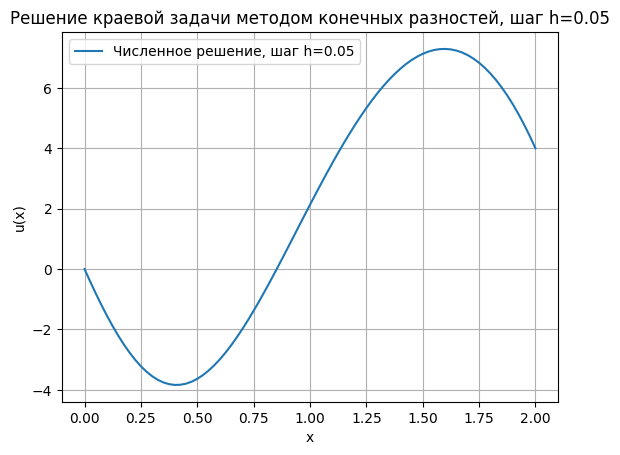

In [27]:
x, U, N_final = adaptive_step(initial_N, epsilon)
plt.plot(x, U, label=f'Численное решение, шаг h={(b-a)/N_final}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title(f'Решение краевой задачи методом конечных разностей, шаг h={(b-a)/N_final}')
plt.legend()
plt.grid(True)
plt.show()

# 10.4.21  =======================